In [24]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [29]:
def classify_dogbreed(img_path, crop = False, xmin = None, ymin = None, xmax = None, ymax = None):
    '''
    classify the dog breed of the image
    :param image: image to classify
    :return: dog breed
    '''
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    with open(img_path, 'rb') as f:
        image = Image.open(f).convert("RGB")

    # load the model
    model = torch.load('dog_breed_classifier.pth').to(device)
    model.eval()
    all_labels = np.load('dog_labels.npy')
    if crop:
        image = image.crop((xmin, ymin, xmax, ymax))
    transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image = transform(image).to(device).unsqueeze(0)

    #display image
    plt.imshow(image.squeeze(0).permute(1, 2, 0).cpu().numpy())
    plt.show()
    outputs = model.forward(image)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()
    predicted = predicted.astype(int)
    predicted_breed = all_labels[predicted]
    print(predicted_breed)
    #top 5 most likely classes
    _, top5 = outputs.topk(5)
    top5 = top5.cpu().numpy()
    top5 = top5.astype(int)
    top5_breeds = all_labels[top5]
    print(top5_breeds)
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


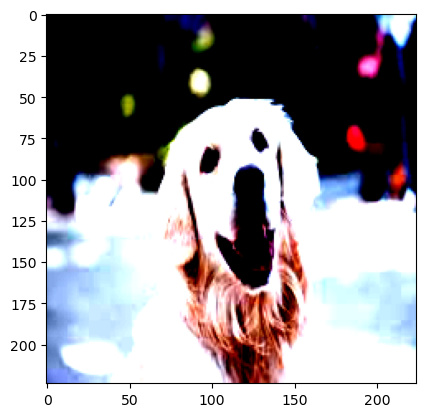

['Saluki']
[['Saluki' 'otterhound' 'Afghan_hound' 'redbone' 'beagle']]


In [30]:
classify_dogbreed('C:/bccn/programming/PCPuppies/demodata/dog_image.jpeg')